In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

import time
from selenium import webdriver
# for headless
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [4]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}



# url = 'https://www.dell.com/community/PowerEdge-Hardware-General/PowerEdge-R730XD-Loading-BIOS-Drivers/m-p/7644944#M65318'
url = 'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW'
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')

print(soup.title.text)


	PowerEdge Hardware General - Dell Community



# Selenium vCookie_3

- using `JavascriptExecutor` to perform the click operation on the "Load more" button


- Also, The `MoveTargetOutOfBoundsException` error can occur when the scroll action goes beyond the bounds of the webpage. To avoid this error, we can try a different approach by scrolling to the bottom of the page using execute_script() and then clicking the "Load more" button.

- rather than print, will save to link_list
- param `num_clicks` which indicates the number of times to click the "Load more" button

## Filter list `links`


- rather than print, will save to `link_list`
- wil LATER param `num_clicks` which indicates the number of times to click the "Load more" button


Remove:


- `https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW` 


Retain links like the links below:

- `https://www.dell.com/community/PowerEdge-Hardware-General/Dell-R820-dedicated-iDRAC-interface-issues/td-p/8396971/jump-to/first-unread-message` 
- `https://www.dell.com/community/PowerEdge-Hardware-General/Unable-to-upgrade-iDRAC-7-from-2-21-21/td-p/8388296/jump-to/first-unread-message`

# Filter webpage by `Solved` cases

- lets go back and adjust method, to click Filter by Solved first
- 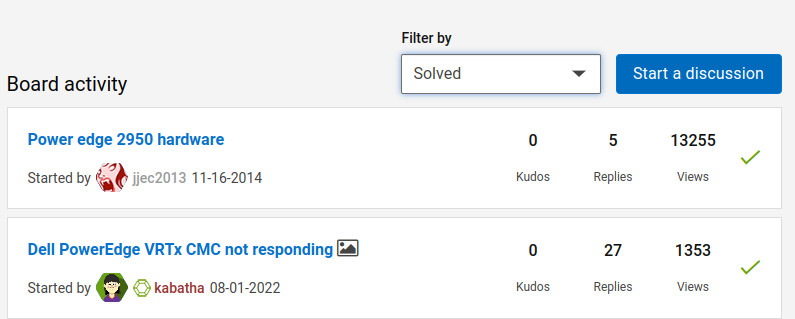

- Right click and `Inspect Element`
- 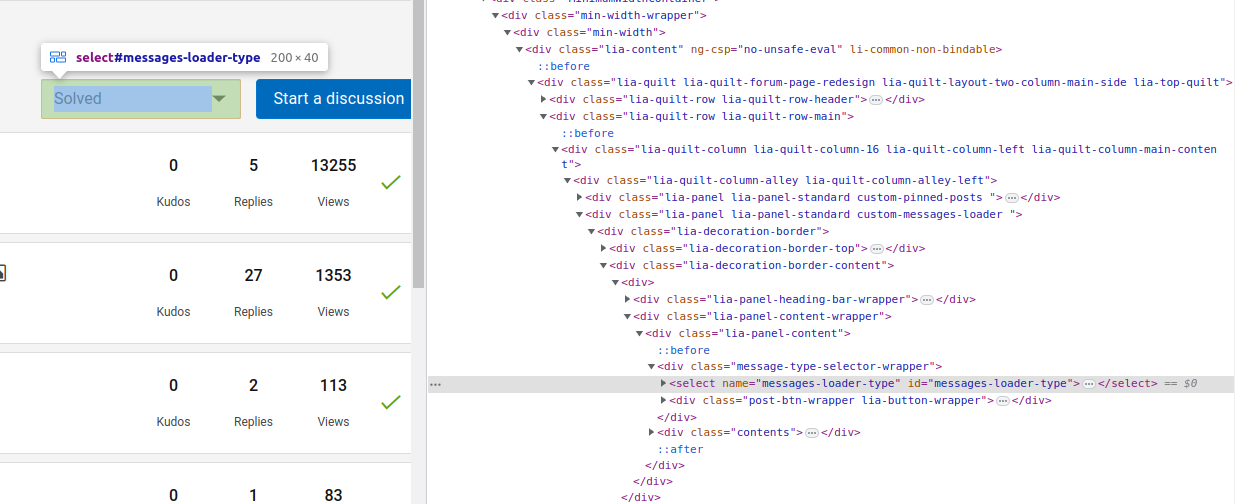

- `<select name="messages-loader-type" id="messages-loader-type"> <option value="recent" selected="">Latest activity</option> <option value="solved">Solved</option> <option value="topkudos">Kudoed</option> </select>`
- `<option value="solved">Solved</option>`


```
    # Select the "Solved" option from the dropdown
    select_element = driver.find_element(By.ID, 'messages-loader-type')
    option_solved = select_element.find_element(By.XPATH, "//option[@value='solved']")
    option_solved.click()
    
```

- As we increase `num_clicks` to be `>90` we hit an error because we are not giving the function enough time to scroll down the increasingly larger webpage `ElementClickInterceptedException`

In [13]:
def automate_dell_forum(num_clicks):
    # Instantiate the Selenium web driver
    driver = webdriver.Chrome()
    driver.maximize_window()  # Maximize the browser window

    # Navigate to the Dell community forum page
    driver.get('https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW')

    # Press the "Accept All" button for cookies
    accept_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))
    accept_button.click()
    
    # Select the "Solved" option from the dropdown
    select_element = driver.find_element(By.ID, 'messages-loader-type')
    option_solved = select_element.find_element(By.XPATH, "//option[@value='solved']")
    option_solved.click()

    # Wait for the page to load after selecting "Solved" option
    time.sleep(2)

    # Scroll to the bottom of the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait for a few seconds before clicking the "Load more" button
    time.sleep(2)

    # Click the "Load more" button the specified number of times
    load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'btn-load-more')))
    for _ in range(num_clicks):
        load_more_button.click()

    # Wait for the page to load after clicking "Load more" button
    time.sleep(2)

    # Get all href urls on the page and save them to a list
    urls = driver.find_elements(By.XPATH, '//a[@href]')
    url_list = [url.get_attribute('href') for url in urls]

    # Close the Selenium web driver
    driver.quit()

    return url_list

# Call the method to automate the process and get the url list, num_of_clicks=
url_list = automate_dell_forum(60)

# Print the urls (forum posts)
for url in url_list:
    print(url)



https://www.dell.com/learn/IE/en/IEcorp1/policies-privacy
http://www.dell.com/
https://www.delltechnologies.com/
https://www.dell.com/en-us/
https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.solutions.href
https://www.dell.com/support/home/?l=en
https://www.dell.com/community/
javascript:void(0)
https://www.dell.com/community/Dell-Community/ct-p/English?profile.language=en
https://www.dell.com/community/Comunidade-da-Dell/ct-p/Portuguese?profile.language=pt
https://www.dell.com/community/Comunidad-de-Dell/ct-p/Spanish?profile.language=es
https://www.dell.com/community/%E6%88%B4%E5%B0%94%E7%A4%BE%E5%8C%BA/ct-p/Chinese?profile.language=zh-CN
https://www.dell.com/community/Communaut%C3%A9-Dell/ct-p/French?profile.language=fr
https://www.dell.com/community/Dell-Gemeinschaft/ct-p/German?profile.language=de
https://www.dell.com/community/%E3%83%87%E3%83%AB%E3%82%B3%E3%83%9F%E3%83%A5%E3%83%8B%E3%83%86%E3%82%A3/ct-p/Japanese?profile.language=ja
https://www.dell.co

In [14]:
len(url_list)

1073

To adjust the code to increase the `WebDriverWait `time exponentially after every `70` `num_clicks`, you can modify the code as follows:




In [12]:
def automate_dell_forum(num_clicks):
    # Instantiate the Selenium web driver
    driver = webdriver.Chrome()
    driver.maximize_window()  # Maximize the browser window

    # Navigate to the Dell community forum page
    driver.get('https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW')

    # Press the "Accept All" button for cookies
    accept_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))
    accept_button.click()

    # Select the "Solved" option from the dropdown
    select_element = driver.find_element(By.ID, 'messages-loader-type')
    option_solved = select_element.find_element(By.XPATH, "//option[@value='solved']")
    option_solved.click()

    # Wait for the page to load after selecting "Solved" option
    time.sleep(2)

    # Scroll to the bottom of the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait for a few seconds before clicking the "Load more" button
    time.sleep(2)

    # Click the "Load more" button the specified number of times
    wait_time = 10  # Initial WebDriverWait time
    click_counter = 0  # Counter for tracking num_clicks
    load_more_button = WebDriverWait(driver, wait_time).until(EC.element_to_be_clickable((By.ID, 'btn-load-more')))
    for _ in range(num_clicks):
        load_more_button.click()
        click_counter += 1
        
        if click_counter % 50 == 0:
            wait_time = wait_time ** 2
            load_more_button = WebDriverWait(driver, wait_time).until(EC.element_to_be_clickable((By.ID, 'btn-load-more')))

    # Wait for the page to load after clicking "Load more" button
    time.sleep(2)

    # Get all href urls on the page and save them to a list
    urls = driver.find_elements(By.XPATH, '//a[@href]')
    url_list = [url.get_attribute('href') for url in urls]

    # Close the Selenium web driver
    driver.quit()

    return url_list

# Call the method to automate the process and get the url list
url_list = automate_dell_forum(90)

# Print the urls (forum posts)
for url in url_list:
    print(url)


ElementClickInterceptedException: Message: element click intercepted: Element is not clickable at point (740, 1885)
  (Session info: chrome=111.0.5563.64)
Stacktrace:
#0 0x558ede73b243 <unknown>
#1 0x558ede4ff7a6 <unknown>
#2 0x558ede54348f <unknown>
#3 0x558ede5413e6 <unknown>
#4 0x558ede53ec9e <unknown>
#5 0x558ede53dd18 <unknown>
#6 0x558ede531a65 <unknown>
#7 0x558ede55d082 <unknown>
#8 0x558ede5312e3 <unknown>
#9 0x558ede55d24e <unknown>
#10 0x558ede575932 <unknown>
#11 0x558ede55ce53 <unknown>
#12 0x558ede52f9ea <unknown>
#13 0x558ede530b2e <unknown>
#14 0x558ede78fd5e <unknown>
#15 0x558ede793a80 <unknown>
#16 0x558ede7758b0 <unknown>
#17 0x558ede794b63 <unknown>
#18 0x558ede766f75 <unknown>
#19 0x558ede7b7998 <unknown>
#20 0x558ede7b7b27 <unknown>
#21 0x558ede7d2c23 <unknown>
#22 0x7f8218094b43 <unknown>


# Filtered Solved List

In [15]:
def filtered_urls(url_list):
    filtered_urls = []
    exclude_urls = [
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW#',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.solutions.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.careers.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.about.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW'
    ]
    for url in url_list:
        if url.startswith('https://www.dell.com/community/PowerEdge-Hardware-General/') and url not in exclude_urls:
            filtered_urls.append(url)
    return filtered_urls

# Filter the urls
filtered_urls = filtered_urls(url_list)

# Print the filtered urls
for url in filtered_urls:
    print(url)


https://www.dell.com/community/PowerEdge-Hardware-General/DELL-EMC-Support-videos/td-p/7529991/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/Configuring-Memory-on-boot-and-that-s-it/td-p/8398511/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/PE2950-missing-side-mushrooms-for-rails/td-p/3993848/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/PowerEdge-T330-and-T430-and-GTX-1080-Ti/td-p/5086336/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/CMOS-battery-and-BIOS-settings-on-a-PowerEdge-R430/td-p/8399944/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/PowerEdge-T620-Front-Panel/td-p/8400301/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/Poweredge-R730-Memory-configuration/td-p/8400002/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-



- The first `lia-message-body-content` always references the Question
- The seconnd `lia-message-body-content` is always the pinned answer (for "Solved" forum posts)
- So we will simple combine now, save the first `lia-message-body-content` into `Questions` and the second into `Answers`



# Q & A

- first will be saved as Question
- second saved as Answers
- 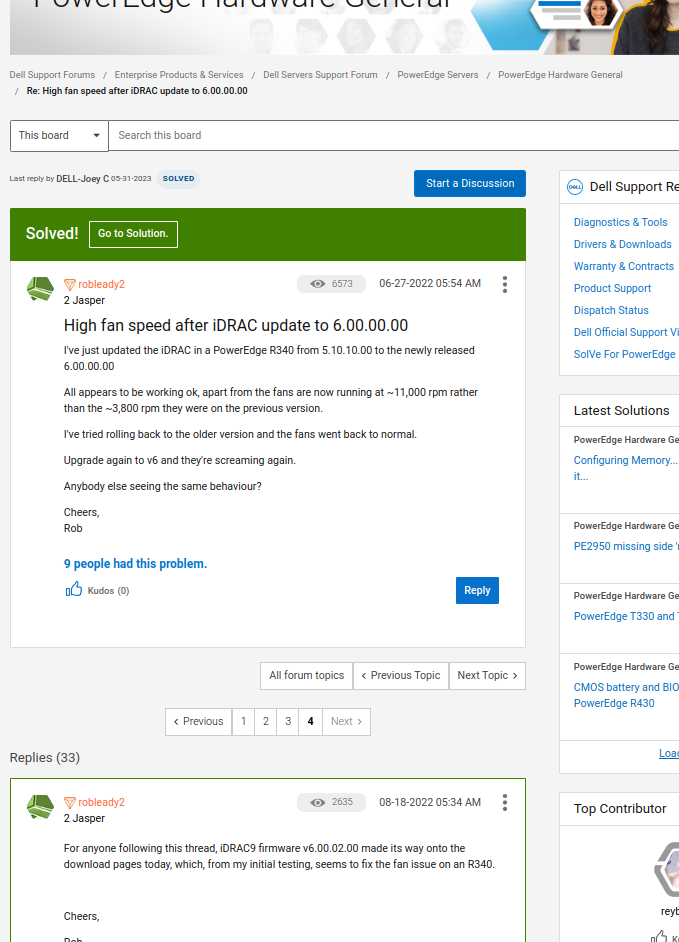


- save as DF

In [16]:
# QA method
def extract_elements_with_class(urls, class_name):
    elements_list = []
    for url in urls:
        try:
            response = requests.get(url)
            soup = BeautifulSoup(response.content, 'html.parser')
            elements = soup.find_all(class_=class_name)
            elements_list.append(elements[0].text.strip())
            if len(elements) >= 2:
                elements_list.append(elements[1].text.strip())
            else:
                elements_list.append("")  # Append an empty string if the second element is not found
        except requests.exceptions.RequestException:
            # Handle connection errors or invalid URLs
            elements_list.append("")  # Append an empty string if there's an error
    return elements_list

class_name = "lia-message-body-content"

extracted_elements = extract_elements_with_class(filtered_urls, class_name)

# Split the extracted elements into Questions and Answers lists
Questions = extracted_elements[::2]
Answers = extracted_elements[1::2]

# Create a dataframe called QA
QA = pd.DataFrame({"Questions": Questions, "Answers": Answers})

# Print the QA dataframe
print(QA)


                                             Questions  \
0    We provide you a variety of support related vi...   
1    Hi,I haven't used my PowerEdge T620 in a year ...   
2    Hi\nI'm not sure what they are called but my P...   
3    Hi All !\nDoes anyone know of a Cuda PCIe 3.0 ...   
4    Hi, I think the BIOS settings will default aft...   
..                                                 ...   
246  I have a T420 on Xerox BIOS 1.5.1 I was planni...   
247  Hello. Our server (PowerEdge R620, Windows 201...   
248  I have a PowerEdge R720 server with iDRAC 7. A...   
249  Hi all,I have  a Dell 1929W ups mounted in my ...   
250  i have 2 hardisk  with raid 1 mirroring  if th...   

                                               Answers  
0    Hi All,\nthere are 2 new videos up on the chan...  
1    Hi, what Joey means is that if you have a pc, ...  
2    Unfortunately they come with the chassis and a...  
3    Hello.\nThe T330 server does not support GPU c...  
4    Hello Alexand

## testing the pairing

In [20]:
# Set pandas options to display all columns and rows without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [13]:
print(QA.iloc[24])


Questions                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Solved!\n\t\t\t\t\t\n\t

In [15]:
print(filtered_urls[24])

https://www.dell.com/community/PowerEdge-Hardware-General/dell-R740-won-t-initialise-7-68tb-dell-emc-MZ-ILT7T6A/td-p/8386289/jump-to/first-unread-message


## The Question is typed as a title

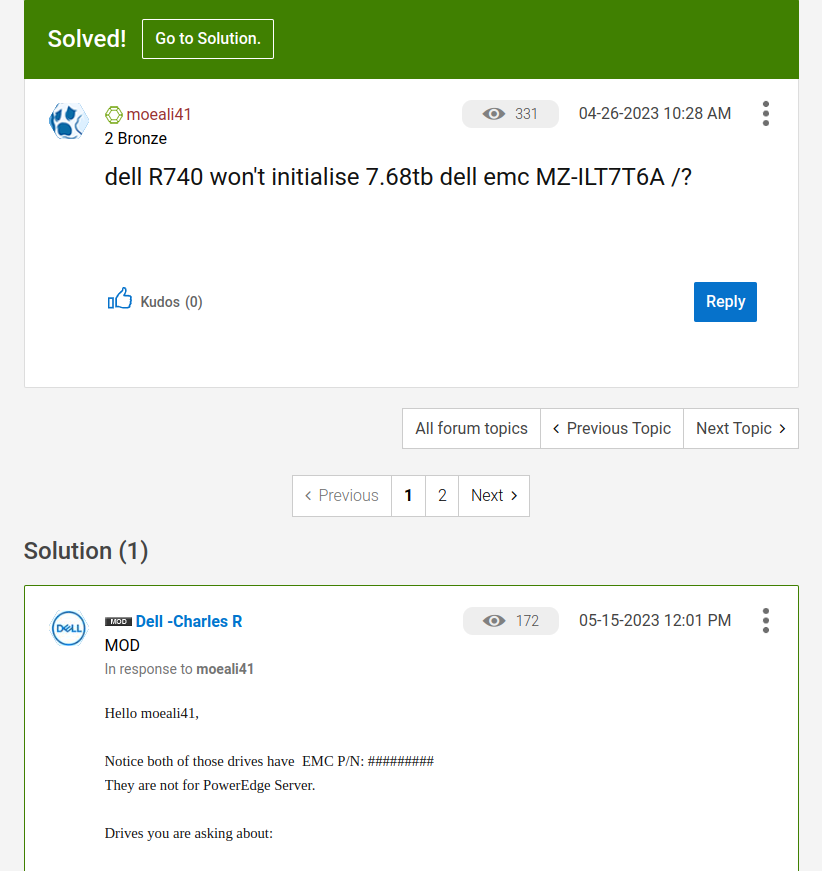

## cleaning dataframe entries

In [27]:
# Create a new dataframe for cleaned data
QA_cleaned = QA.copy()

# Clean up the "Questions" and "Answers" columns
QA_cleaned['Questions'] = QA_cleaned['Questions'].str.replace('Go to Solution', '').str.replace('Solved!', '')
QA_cleaned['Questions'] = QA_cleaned['Questions'].str.replace('\n', '').str.replace('\t', '').str.replace('IWork4Dell', '')
QA_cleaned['Questions'] = QA_cleaned['Questions'].str.replace("Did I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!", '')

QA_cleaned['Answers'] = QA_cleaned['Answers'].str.replace("Did I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!", '')
QA_cleaned['Answers'] = QA_cleaned['Answers'].str.replace("View solution in original post", '')
QA_cleaned['Answers'] = QA_cleaned['Answers'].str.replace('\n', '').str.replace('\t', '').str.replace('#IWork4Dell', '')


/tmp/ipykernel_12014/3115642962.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  QA_cleaned['Questions'] = QA_cleaned['Questions'].str.replace("Did I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!", '')
/tmp/ipykernel_12014/3115642962.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  QA_cleaned['Answers'] = QA_cleaned['Answers'].str.replace("Did I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!", '')


In [28]:
print(QA_cleaned.iloc[24])

Questions    I downloaded esxi iso image from your website, burn it on usb using rufus, boot it... every thing goes well until i must should the drive to install on, it can't detect my 1TB hdd.
Answers                Have you created a RAID volume for the drive? With it being a standalone disk, you would need a single drive RAID 0 for the controller to put the drive online.#Iwork4Dell
Name: 24, dtype: object


In [18]:
QA_cleaned.to_csv('QA_cleaned.csv', index=False)

In [23]:
QA_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  251 non-null    object
 1   Answers    251 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [29]:
QA_cleaned.tail(20)

,Questions,Answers
231,"Having the same issue right now. On our PowerEdge R740 we updated Firmware few Weeks ago, also for NIC's. Since this time we have random messages from Idrac: The Integrated NIC 1 Port 3 network link is down, after 5 seconds, The Integrated NIC 1 Port 2 network link is started. We use Dell FM487 Daughter Card Broadcom 5720 Quad-Port 1GbE. Before the updates no such Messages. Any ideas ? Thanks.","Is the message seen after iDRAC or NIC FW update. Can you ensure all iDRAC, BIOS and NIC FW are latest and check the behaviour?Thanks,DELL-Shine K"
232,I'm wondering if the Broadcom 57800S Quad Port 2x 10GbE SFP + 2x 1GbE would work in a R730xd? Would the same card also work in a R720? .,"Below NDC card is supported on both R720xd and R730xd.165T0PWA,PLN,RNDC,QLGX,2+2,SFP,V2Rack Network Daughter Card, PCIe, Network Card, QLogic 57800S Quad Port 2, 1GB x 2, rNDC SFP+/DA V2, 10GbpsThanks,DELL-Shine K"
233,"Hi,We dozen of new 14g servers, they were running (with no or minimal load) in last few weeks without any issues.After we deployed BIOS upgrade (1.3.7), and rebooted (even power off/on), some of the servers (every 3rd) got locked with below kernel messages. Doesn't matter if BIOS 1.3.7 or BIOS 1.2.11 are installed, problem persist. Even after few days of running (minimal or no load at all) they've got locked.How we should proceed from here, as the servers should get more load, and we lost faith in stability of them. Running fulling updated RHEL v7 and firmwares. bnxt_en modules are dies, and lock network access and spews constantly 00:03:34 kernel: bnxt_en 0000:19:00.0 em1: Error (timeout: 500) msg {0x23 0x12be} len:000:03:34 kernel: bnxt_en 0000:19:00.1 em2: Error (timeout: 500) msg {0x51 0x12d6} len:0More about the kernel message on paste bin url: Kernel messages of crashed bnxt_enPlease let us know which way to proceed from here.Thank you! .",Yes.Solution was to power down the server(s) and *remove* power cords for 5 minutes.This will force re-init of the NIC firmware.
234,"Hi All,Does anyone know what this iDRAC attribute does?<Attribute Name=""AutoOSLockGroup.1#AutoOSLockState"">Enabled</Attribute>The attribute registry states:Auto OS Lock GroupThis group contains the attributes that provides details about Auto OS lock groupAny ideas?Thanks.....","Mostavern,The attribute you are referring to is a setting you can set to disable the OS's auto lock when you are using the Virtual Console, this is in order to keep the OS from disconnecting the session due to inactivity. Let me know if this helps.DELL-Chris HSocial Media and Communities ProfessionalDell Technologies | Enterprise Support ServicesDid I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!"
235,"Hello,Our R930 has Samsung M393A2K43BB1-CRC dual rank memory modules. We would like to buy more RAM, but I only found Samsung M393A2G40EB1-CRC dual rank RAM. Little difference in their name. Is there be any problem If I mix these RAMs together? Thanks,F.","Looks like are both have same type, rank, speed and size. Mixing of memory is supported. You can refer below link for more details on memory installation guidelines. https://www.dell.com/support/manuals/en-us/poweredge-r930/r930om/general-memory-module-installation-... Thanks,DELL-Shine K"
236,"Recently replaced the mobo in one of our PowerEdge R820 machines...I'm now getting ""PEM cant not post: cpu in socket 4 did not come out of reset""Based off another post, I'm curious if the PEM we had previously is not compatible with the new mobo.NEW Motherboard DP/N: 0JC2W3Old Expansion Riser Board DP/N: 08HJ4PIf that is indeed the case, what P/N should I be looking for to add a riser to our R820?Thanks!.","Hello wxtwb, I hope this helps. With System board:Part#JC2W3 - ASSY,PWA,PLNR,SV,R820,NTPM,3 Compatible PEM:Part#7TJ0F - ASSY,PWA,PEM,R820,NTPM Dell -Charles RSocial Media and Communities ProfessionalDell Technologies | Enterprise Support ServicesDid I answer your query? Please clic

## save any http link attempt

In [35]:
QA_cleaned['Document_links'] = QA_cleaned['Answers'].apply(lambda x: re.findall('https://[\S]+', x))

# Convert the list of links into a single string separated by commas
QA_cleaned['Document_links'] = QA_cleaned['Document_links'].apply(lambda x: ', '.join(x) if x else '')

# Create a new DataFrame called 'QA_docs' with selected columns
QA_docs = QA_cleaned[['Questions', 'Answers', 'Document_links']].copy()



In [38]:
QA_docs.head(50)

,Questions,Answers,Document_links
0,"We provide you a variety of support related videos on our DELL EMC Support YouTube channel. We publish at least one new video every week so make sure you subscribe and stay up to date with the latest turoials, tipps and tricks about server, storage and networking. Here are some playlist you might find helpful for your daily business regarding DELL EMC Enterprise hardware.OpenManage Server Administrator RAID - Tutorials, Information and Troubleshooting Dell EMC QuickTips - something about everything iDRAC - Setup, Configuration, Troubleshooting Dell Lifecycle Controller SupportAssist Enterprise Virtual Edition You can find the full list here. Something is missing? Got a topic we should cover in one of our videos? Feel free to suggest new topics and give us feedback to existing ones in this thread.","Hi All,there are 2 new videos up on the channel. As always a Quick Tip Video on Service Tag locations and in addition we show you how to install OMSA on ESXi 6.7And don't forget to like the videos and subscribe to our channel for all the latest updates!",
1,"Hi,I haven't used my PowerEdge T620 in a year or so. When I just turned it ON, it says:Configuring Memory....and that's it. Nothing happens. It has been doing this for 30 minutes now. I remember having done something like this over a year ago and it did the same thing. I believe I waited for hours and then turned it off. Anyhow, does anyone know what the problem could be? I have 64GB installed and maybe I can take out some memory sticks and see what happens. If that is a good idea, I would need to know in which slots I then have to plug in the memory. The manual is a bit funkt when wanting to use 32GB with 8GB sticks... Thanks..","Hi, what Joey means is that if you have a pc, another topic should be opened for it. For T620, I think it's in no post status.You can make drain power at first as a few steps you can try.Drain server flea power and check for any error messages during POST1) Remove any external peripherals from the server2) Turn system off and remove input power from the server3) Hold down power button for 10 seconds with power unplugged and then wait for one minute4) Re-apply input power and turn system on. Please try to min2post https://dell.to/3IIIkVOOne processor (CPU) in socket processor 1One memory module (DIMM) in socket A1One power supply unithttps://dell.to/3IM2lebSystem Board Jumper SettingsFor information on resetting the password jumper to disable a password, see Disabling A Forgotten Password.Table 1. System Board Jumper SettingsJUMPERSETTINGDESCRIPTIONPWRD_EN (default)The password feature is enabled (pins 2–4). The password feature is disabled (pins 4–6). BIOS local access is unlocked at the next AC power cycle.NVRAM_CLR(default)The configuration settings are retained at the next system boot (pins 3–5). The configuration settings are cleared at system boot (pins 1–3).Thanks,Erman ÖzkurtSocial Media and Communities Professional Dell Technologies | Enterprise Support Services Did I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!","https://dell.to/3IIIkVOOne, https://dell.to/3IM2lebSystem"
2,"HiI'm not sure what they are called but my PE2950 is missing the side 'mushrooms' for rack mounting. These are the parts that fit onto the threaded studs in the side of the chassis (3 each side) that then drop into the sliding rails. The bits circled in red:Is it possible to buy these from Dell? I've not managed to find anything so far.Thanks,Simon.",Unfortunately they come with the chassis and are not offered by Dell for sale that I can find. I did find a compatible set here - www.racksolutions.com/shoulder-screws-nuts.htmlLet me know if this helps.DELL-Chris HSocial Media and Communities ProfessionalDell Technologies | Enterprise Support ServicesDid I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!,
3,Hi All !Does anyone know of a Cuda PCIe 3.0 video card that w

In [37]:
QA_docs.to_csv('QA_docs.csv', index=False)

# KB

- https://www.dell.com/community/Knowledge-Base/tkb-p/EN-TKB